# Apprentissage with BertTOPIC

## What is BertTOPIC ?
BERTopic is a topic modeling python library that combines transformer embeddings and clustering model algorithms to identify topics in NLP (Natual Language Processing).

In [1]:
%pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 90 kB 3.6 MB/s 
     |████████████████████████████████| 88 kB 6.1 MB/s 
     |████████████████████████████████| 85 kB 4.7 MB/s 
     |████████████████████████████████| 662 kB 40.9 MB/s 
     |████████████████████████████████| 5.2 MB 50.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 5.8 MB 45.5 MB/s 
     |████████████████████████████████| 1.3 MB 34.2 MB/s 
     |████████████████████████████████| 182 kB 64.4 MB/s 
     |████████████████████████████████| 7.6 MB 58.8 MB/s 
     |████████████████████████████████| 1.1 MB 53.0 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp38-cp38-linux_x86_64.whl size=2700867 sha256=6dde1a256ce711f8b563dde68b4fdd9dff6c67146354d8df4f7e285d22777fe6
  Stored in directory: /root/.cache/

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm

from bertopic import BERTopic

In [3]:
from umap import UMAP

In [4]:
%pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 5.1 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=ce9fe79b6da46fb7b855bcef36f61d2380b1bbffe767e8974bb0d81e8d2e2852
  Stored in directory: /root/.cache/pip/wheels/13/c7/b0/79f66658626032e78fc1a83103690ef6797d551cb22e56e734
Successfully built langdetect


In [5]:
from langdetect import detect

In [6]:
import ast

In [177]:
lexique = {
    "Université": ["campus", "professor", "lecture", "semester", "degree", "enrollment", "tuition", "dormitory", "library", "exam", "grade", "credit", "major", "minor", "class", "lecture hall", "research", "thesis", "dissertation", "clase","plagiarism", "academic integrity", "curriculum", "internship", "fellowship", "grant", "bursary", "tuition fee", "scholarship", "fellowship", "grant", "bursary"],
    "Publicité": ["advertising", "promotion", "marketing", "customer", "sales", "banner", "brochure", "catalog", "flyer", "poster", "billboard", "commercial", "infomercial", "endorsement", "testimonial", "mailing list", "newsletter", "email marketing", "influencer marketing", "customer acquisition", "conversion rate", "offer", "discount", "product"],
    "Commandes/Tickets": ["order", "purchase", "checkout", "shopping cart", "invoice", "receipt", "ticket", "reservation", "booking", "confirmation", "cancellation", "refund", "delivery", "shipping", "tracking", "customer service", "call center", "hotline", "escalation", "complaint", "feedback", "review", "rating", "warranty", "guarantee", "return policy", "exchange policy"],
    "Economie": ["bank", "savings account", "eur", "checking account", "credit card", "debit card", "ATM", "online banking", "mobile banking", "investment", "asset", "liability", "interest", "fees", "charge", "balance", "transaction", "deposit", "withdrawal", "transfer", "loan", "mortgage", "insurance", "bill", "invoice", "statement", "payment", "late fee", "penalty"],
    "RDV": ["appointment", "meeting", "monday", "tuesday", "wednesday", "thursday", "friday", "saturday","sunday","schedule", "possible", "agenda", "calendar", "deadline", "reminder", "notification", "confirmation", "cancellation", "reschedule", "no-show", "waiting list", "booking", "reservation", "availability", "flexibility", "urgency", "priority", "request", "proposal", "offer", "counteroffer", "negotiation", "agreement", "disagreement", "compromise"],
    "Réseaux Sociaux": ["social media", "network", "facebook","linkedin", "instagram", "platform", "profile", "timeline", "feed", "friend", "follower", "like", "comment", "share", "tag", "hashtag", "mention", "DM", "PM", "post", "tweet", "status", "story", "live", "video", "photo", "image", "link", "hashtag", "trending", "viral", "influencer", "advertising", "marketing"],
    "Administratif": ["administration", "office", "manager", "staff", "employee", "human resources", "personnel", "policy", "procedure", "regulation", "law", "contract", "agreement", "permit", "license", "certificate", "document", "record", "file", "archive", "database", "system", "software", "hardware", "network", "security", "access", "privilege", "permission"],
    "Pro/Candidatures": ["job", "internship", "offer", "application", "employment", "career", "professional", "work", "resume", "CV", "cover letter", "application", "interview", "selection", "hiring", "promotion", "training", "development", "performance", "evaluation", "feedback", "review", "salary", "benefit", "perk", "incentive", "bonus", "raise", "promotion", "advancement", "progression", "succession"],
    "Account & Password": ["account", "username", "password", "login", "logout", "security", "privacy", "protection", "encryption", "authentication", "verification", "authorization", "access", "permission", "privilege", "restriction", "violation", "hacking", "phishing", "spam", "virus", "malware", "ransomware", "trojan", "worm", "spyware", "adware", "popup"],
    "Logement": ["housing", "rent", "rental", "home", "residence", "apartment", "condo", "townhouse", "mansion", "villa", "manor", "cottage", "farmhouse", "landlord", "tenant", "rent", "lease", "agreement", "contract", "mortgage", "property", "real estate", "development", "construction", "renovation", "furniture", "appliance", "utility", "amenity", "facility"]
}

In [8]:
final_dataset = pd.read_csv("datacleaned/df_10000.CSV")
final_dataset = final_dataset.drop(['Unnamed: 0'], axis=1) #remove columns creted bc of the to_csv() in the cleaning
final_dataset = final_dataset.iloc[0:10000]
print(final_dataset.shape)

(10000, 3)


In [9]:
final_dataset

,objet,corps,adresse
0,"[']', 'mission', 'promotion', 'important', 'me...","['dear', 'student', 'ambassador', 'lutt', 'you...","['etudiants-request', 'utt', 'fr']"
1,"[']', 'message', 'pierre', 'koch', 'personal',...","['english', ']', 'dear', 'fellow', 'student', ...","['etudiants-request', 'utt', 'fr']"
2,"['your', 'instagram', 'password', 'change']","['this', 'confirmation', 'password', 'instagra...","['no-reply', 'mail.instagram', 'com']"
3,"[']', 'fwd', 'challenge', 'inter', 'entreprise...","['de', 'michel', 'legault', 'sport', 'cc', 'sd...","['sport-request', 'utt', 'fr']"
4,"['confirmation', 'ter', 'ticket', 'order']","['confirmation', 'trip', 'monday', 'november',...","['mesbilletsTER-noreply', 'ter-sncf', 'fr']"
...,...,...,...
9995,"['tedxwoman', 'way']","['imagine', 'explore', 'build', 'tedxwoman', '...","['no-reply', 'ted', 'com']"
9996,"[']', 'justification', 'medical', 'absence', '...","['welcome', 'welcome', 'welcome', 'lutt', 'her...","['etudiants-request', 'utt', 'fr']"
9997,"['early', ']', 'good', 'plan', 'velo', 'schola...","['hello', 'the', 'rucher', 'creative', 'offer'...","['vie.etudiante-request', 'utt', 'fr']"
9998,"['week', 'review', 'elon', 'big', 'week']","['techcrunch', 'newsletter', 'saturday', 'apri...","['newsletter', 'techcrunch', 'com']"


In [10]:
from nltk.corpus import stopwords

def stop_words(text):
    stop_words = stopwords.words('french')
    text = [word for word in text if ((word not in stop_words) and (len(word)>1))]
    
    return text

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
tt= np.array([])
for i in final_dataset.index:
    texte = ast.literal_eval(final_dataset['corps'][i])
    texte = stop_words(texte)
    final_dataset['corps'][i] = texte
    if ('nan' in texte) or (len(texte) < 4):
        final_dataset.drop(i, axis=0, inplace=True)
    else:
        langue = detect(' '.join(final_dataset['corps'][i]))
        tt = np.append(tt, langue)

final_dataset = final_dataset.reset_index()
final_dataset.head()

In [13]:
uniqus, counts = np.unique(tt, return_counts=True)
dd = dict(zip(uniqus, counts))

dd

{'af': 7,
 'ca': 3,
 'cy': 6,
 'de': 22,
 'en': 9064,
 'es': 50,
 'fi': 1,
 'fr': 426,
 'id': 7,
 'it': 25,
 'lt': 2,
 'nl': 23,
 'no': 2,
 'pl': 39,
 'ro': 7,
 'so': 3,
 'sv': 20,
 'tl': 4}

In [ ]:
j = 0
cc = 0
while j < len(final_dataset['corps']):
  #if tt[j] == 'en':    
  for mot in final_dataset['corps'][j]:
      if len(mot)<3: 
        cc +=1
        final_dataset['corps'][j].remove(mot)    
  j=j+1

In [15]:
emails = final_dataset['corps']

In [16]:
i = 0
while i< len(emails):
  emails[i] = ' '.join(emails[i])
  i+=1

In [17]:
emails

0       dear student ambassador lutt you make promotio...
1       english dear fellow student for four week mobi...
2       this confirmation password instagram account o...
3       michel legault sport sds envoy wednesday octob...
4       confirmation trip monday november hello you pl...
                              ...                        
9706    imagine explore build tedxwoman event tedxpaju...
9707    welcome welcome welcome lutt here procedure fo...
9708    hello the rucher creative offer velos scholars...
9709    techcrunch newsletter saturday april greg kump...
9710    hello follow request allow enjoy beautiful spi...
Name: corps, Length: 9711, dtype: object

In [18]:
# Initiate UMAP
umap_model = UMAP(n_neighbors=15, 
                  n_components=5, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=100)
# Initiate BERTopic
topic_model = BERTopic(umap_model=umap_model, language = "multilingual", calculate_probabilities=True, nr_topics=12)
# Run BERTopic model
topics, probabilities = topic_model.fit_transform(emails)

Downloading:   0%|          | 0.00/968 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.79k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/645 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/471M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/480 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/14.8M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [19]:
# Get the list of topics
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,6272,-1_the_student_message_hello
1,0,550,0_message_attachment_possible_utt
2,1,444,1_eur_ticket_travel_reservation
3,2,367,2_linkedin_ireland_wilton_unlimited
4,3,354,3_france_linkedin_job_ile
5,4,292,4_oscar_linkedin_benoit_network
6,5,283,5_password_connection_change_account
7,6,264,6_store_eur_apple_offer
8,7,204,7_application_position_team_thank
9,8,178,8_internship_professional_offer_interview


In [20]:
# Get top 10 terms for a topic
topic_model.get_topic(0)

[('message', 0.09657256666235522),
 ('attachment', 0.05748866173097765),
 ('possible', 0.05514533436658089),
 ('utt', 0.04941156728657407),
 ('sport', 0.03778841547732872),
 ('internet', 0.0371070558715126),
 ('the', 0.036366242452673295),
 ('contamination', 0.03615835434441918),
 ('damage', 0.036014588913230255),
 ('cause', 0.035792136362253625)]

In [21]:
# Visualize top topic keywords
topic_model.visualize_barchart(top_n_topics=12)

In [22]:
def is_list_of_zeros(lst):
    for element in lst:
        if element != 0:
            return False
    return True

In [178]:
# utiliser le lexique

categories = {}

for topic in range(12):
    j = 0
    w = [tuple[0] for tuple in topic_model.get_topic(topic)]
    print(w)
    word_occurence = []
    for cat in lexique:
        nb = 0
        for lex in lexique[cat]:
            if lex in w:
                nb = nb+1
        word_occurence.append(nb)

    cat_number = word_occurence.index(max(word_occurence))
    print(word_occurence)
    keys = list(lexique.keys())
    # Use the index to access the key
    key = keys[cat_number]   
    if is_list_of_zeros(word_occurence):
      print("CATEGORIE pour le Topic "+str(topic)+" : autres")
      categories[topic] = "autres"
    else:
      categories[topic] = key
      print("CATEGORIE pour le Topic "+str(topic)+" : ", key)

['message', 'attachment', 'possible', 'utt', 'sport', 'internet', 'the', 'contamination', 'damage', 'cause']
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
CATEGORIE pour le Topic 0 :  RDV
['eur', 'ticket', 'travel', 'reservation', 'paris', 'trip', 'sncf', 'train', 'rental', 'particulier']
[0, 0, 2, 1, 1, 0, 0, 0, 0, 1]
CATEGORIE pour le Topic 1 :  Commandes/Tickets
['linkedin', 'ireland', 'wilton', 'unlimited', 'company', 'plaza', 'dublin', 'logo', 'place', 'mail']
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
CATEGORIE pour le Topic 2 :  Réseaux Sociaux
['france', 'linkedin', 'job', 'ile', 'wilton', 'paris', 'unlimited', 'company', 'ireland', 'offer']
[0, 1, 0, 0, 1, 1, 0, 2, 0, 0]
CATEGORIE pour le Topic 3 :  Pro/Candidatures
['oscar', 'linkedin', 'benoit', 'network', 'hello', 'join', 'would', 'like', 'message', 'receive']
[0, 0, 0, 0, 0, 3, 1, 0, 0, 0]
CATEGORIE pour le Topic 4 :  Réseaux Sociaux
['password', 'connection', 'change', 'account', 'character', 'use', 'different', 'address', 'choose', 'type']
[0, 0, 

In [24]:
# Visualize term rank decrease
topic_model.visualize_term_rank()

In [25]:
# Visualize intertopic distance
topic_model.visualize_topics()

In [26]:
# Visualize connections between topics using hierachical clustering
topic_model.visualize_hierarchy(top_n_topics=12)

In [27]:
# Visualize similarity using heatmap
topic_model.visualize_heatmap()

# EVALUATION

In [179]:
dataset_eval = pd.read_csv("evaluation_1000.csv")
dataset_eval = dataset_eval.drop(['Unnamed: 0'], axis=1) #remove columns creted bc of the to_csv() in the cleaning

dataset_eval.head()

,corps,cat
0,"['dropboxes', 'be', 'ready', 'please', 'note',...",Université
1,"['hello', 'salome', 'note', 'take', 'retake', ...",Université
2,"['dear', 'create', 'team', 'dropboxe', 'please...",Université
3,"['christine', 'degot', 'invite', 'meet', 'zoom...",RDV
4,"['hello', 'salome', 'you', 'yet', 'connect', '...",Université


In [180]:
import ast 

def str_to_list(x):
  return ast.literal_eval(x)

In [62]:
emails_eval = dataset_eval['corps'].apply(str_to_list)

In [63]:
i = 0
while i< len(emails_eval):
  emails_eval[i] = ' '.join(emails_eval[i])
  i+=1
emails_eval.head()

0    dropboxes be ready please note postpone offici...
1    hello salome note take retake regret wait reta...
2    dear create team dropboxe please note might pu...
3    christine degot invite meet zoom planée partic...
4    hello salome you yet connect business game ret...
Name: corps, dtype: object

In [64]:
topics, probabilities = topic_model.transform(emails_eval)

In [181]:
dataset_eval['pred'] = topics

In [182]:
dataset_eval['cat pred'] = dataset_eval['pred'].map(categories)
dataset_eval = dataset_eval.drop('pred', axis=1)
dataset_eval = dataset_eval.dropna()
dataset_eval= dataset_eval[~dataset_eval['cat'].str.contains('Perso')]
dataset_eval= dataset_eval[~dataset_eval['cat'].str.contains('Autres')]

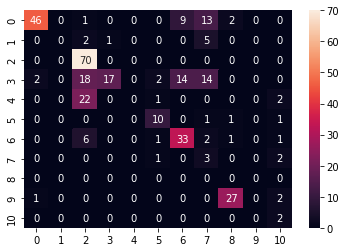

In [183]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Créer une matrice de confusion à l'aide de la fonction confusion_matrix()
matrice_confusion = confusion_matrix(dataset_eval['cat'], dataset_eval['cat pred'])

# Tracer un heatmap de la matrice de confusion à l'aide de seaborn
sns.heatmap(matrice_confusion, annot=True, fmt='d')

In [184]:
# Créer une table de contingence à l'aide de la fonction crosstab()
table_contingence = pd.crosstab(dataset_eval['cat'], dataset_eval['cat pred'], normalize='index')

# Afficher le résultat
# Formater les valeurs de la table en pourcentages à deux décimales
table_formatee = table_contingence.style.format('{:.2f}')

# Afficher le résultat
table_formatee

cat pred,Account & Password,Commandes/Tickets,Economie,Pro/Candidatures,Publicité,RDV,Réseaux Sociaux,Université
cat,,,,,,,,
Account & Password,0.65,0.01,0.00,0.00,0.13,0.18,0.03,0.00
Administratif,0.00,0.25,0.12,0.00,0.00,0.62,0.00,0.00
Commandes/Tickets,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
Economie,0.03,0.27,0.25,0.03,0.21,0.21,0.00,0.00
Logement,0.00,0.88,0.00,0.04,0.00,0.00,0.00,0.08
Pro/Candidatures,0.00,0.00,0.00,0.77,0.00,0.08,0.08,0.08
Publicité,0.00,0.14,0.00,0.02,0.75,0.05,0.02,0.02
RDV,0.00,0.00,0.00,0.17,0.00,0.50,0.00,0.33
Réseaux sociaux,0.03,0.00,0.00,0.00,0.00,0.00,0.90,0.07


In [84]:
dataset_eval.head()

,corps,cat,cat pred
2,"['dear', 'create', 'team', 'dropboxe', 'please...",Université,RDV
23,"['hello', 'salome', 'recent', 'request', 'pass...",Account & Password,Account & Password
24,"['hello', 'salome', 'recent', 'request', 'pass...",Account & Password,Account & Password
50,"['hello', 'it', 'correct', 'document', 'please...",Université,RDV
57,"['application', 'file', 'hello', 'payment', 'a...",Economie,Pro/Candidatures
